### Forecast Performance Baseline

Having a baseline for forecast performance is essential, as it serves as a reference point for all other modeling techniques that we apply to solve the problem. If a model's performance is equal to or worse than the baseline, then that particular technique needs to be improved or discarded. The method used to generate the baseline forecast performance should be simple to implement and not take into account any specific details of the problem.

For time series datasets, the persistence algorithm is the most widely used baseline technique. Using the value at the current time step (t), it forecasts the expected result for the following time step (t+1). This algorithm satisfies the properties required for making a good baseline forecast, which are:

- Simplicity: Little to no intelligence or training is needed for this procedure.
- Speed: Making a prediction is computationally simple and can be implemented quickly.
- Determinism: Given the same input, this approach is deterministic, which means it yields the same output.

## CPU forecast with persistence algorithm

In [1]:
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
file_path = 'MS_68185_POD_91_CPU.csv'
data = pd.read_csv(file_path, parse_dates=True)

# Convert the timestamp to the desired format
# Start date is 01/01/2022
start_date = pd.Timestamp('2022-01-01')

# Convert the timestamp from milliseconds to seconds and add it to the start date
data['timestamp'] = data['timestamp'].apply(lambda x: start_date + pd.Timedelta(seconds=x/1000))

# create lagged dataset
data['cpu_utilization_lagged'] = data['cpu_utilization'].shift(1)


# Define the new order of the columns
new_order = ['timestamp', 'cpu_utilization_lagged', 'cpu_utilization']

# Reorder the columns
data_reordered = data[new_order]

print(data_reordered)

                timestamp  cpu_utilization_lagged  cpu_utilization
0     2022-01-01 00:00:00                     NaN         0.190373
1     2022-01-01 00:01:00                0.190373         0.183195
2     2022-01-01 00:02:00                0.183195         0.173558
3     2022-01-01 00:03:00                0.173558         0.168516
4     2022-01-01 00:04:00                0.168516         0.170707
...                   ...                     ...              ...
27333 2022-01-21 23:55:00                0.167560         0.164315
27334 2022-01-21 23:56:00                0.164315         0.158218
27335 2022-01-21 23:57:00                0.158218         0.153105
27336 2022-01-21 23:58:00                0.153105         0.160283
27337 2022-01-21 23:59:00                0.160283         0.163725

[27338 rows x 3 columns]


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = data.dropna()

#Split the data into training and test sets
train, test = train_test_split(data_reordered, test_size=0.3, shuffle=False)

# Use the lagged cpu_utilization as the prediction
y_true = test['cpu_utilization']
y_pred = test['cpu_utilization_lagged']


mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 0.02
Mean Squared Error: 0.00
Root Mean Squared Error: 0.04


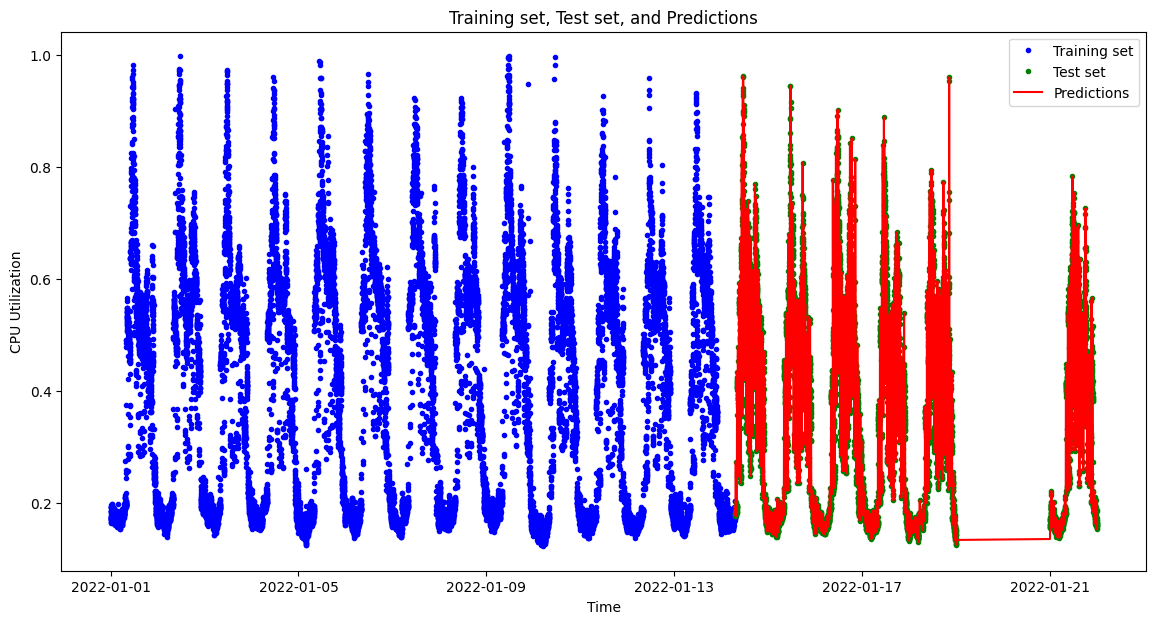

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train['timestamp'], train['cpu_utilization'], 'b.', label='Training set')
plt.plot(test['timestamp'], test['cpu_utilization'], 'g.', label='Test set')
plt.plot(test['timestamp'], y_pred, 'r-', label='Predictions')

plt.title('Training set, Test set, and Predictions')
plt.xlabel('Time')
plt.ylabel('CPU Utilization')
plt.legend()
plt.show()

## Memory forecast with persistence algorithm

In [4]:
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
file_path = 'MS_68185_POD_91_Memory.csv'
data_memory = pd.read_csv(file_path, parse_dates=True)

# Convert the timestamp to the desired format
# Start date is 01/01/2022
start_date = pd.Timestamp('2022-01-01')

# Convert the timestamp from milliseconds to seconds and add it to the start date
data_memory['timestamp'] = data_memory['timestamp'].apply(lambda x: start_date + pd.Timedelta(seconds=x/1000))

# create lagged dataset
data_memory['memory_utilization_lagged'] = data_memory['memory_utilization'].shift(1)


# Define the new order of the columns
new_order = ['timestamp', 'memory_utilization_lagged', 'memory_utilization']

# Reorder the columns
data_reordered = data_memory[new_order]

print(data_reordered)

                timestamp  memory_utilization_lagged  memory_utilization
0     2022-01-01 00:00:00                        NaN            0.662515
1     2022-01-01 00:01:00                   0.662515            0.662292
2     2022-01-01 00:02:00                   0.662292            0.662423
3     2022-01-01 00:03:00                   0.662423            0.662563
4     2022-01-01 00:04:00                   0.662563            0.662420
...                   ...                        ...                 ...
27333 2022-01-21 23:55:00                   0.671951            0.671102
27334 2022-01-21 23:56:00                   0.671102            0.670732
27335 2022-01-21 23:57:00                   0.670732            0.670799
27336 2022-01-21 23:58:00                   0.670799            0.670898
27337 2022-01-21 23:59:00                   0.670898            0.670917

[27338 rows x 3 columns]


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = data.dropna()

#Split the data into training and test sets
train, test = train_test_split(data_reordered, test_size=0.3, shuffle=False)

# Use the lagged cpu_utilization as the prediction
y_true = test['memory_utilization']
y_pred = test['memory_utilization_lagged']


mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 0.00
Mean Squared Error: 0.00
Root Mean Squared Error: 0.01


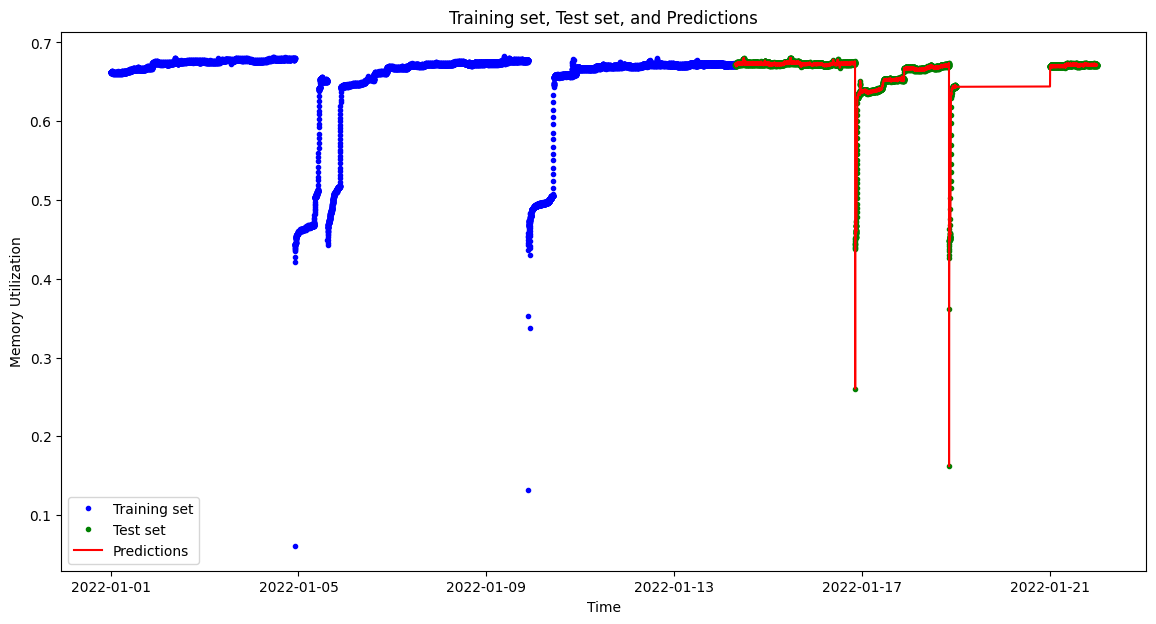

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train['timestamp'], train['memory_utilization'], 'b.', label='Training set')
plt.plot(test['timestamp'], test['memory_utilization'], 'g.', label='Test set')
plt.plot(test['timestamp'], y_pred, 'r-', label='Predictions')

plt.title('Training set, Test set, and Predictions')
plt.xlabel('Time')
plt.ylabel('Memory Utilization')
plt.legend()
plt.show()